# Ошибка в запросе, т.к. в каждом матче не по 10 участников

In [1]:
import urllib2
import json
import random
import datetime

import math 
import pandas as pd 
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt 
 
%matplotlib inline
plt.style.use('ggplot')

### Missings

In [2]:
def findColumnsWithNan(d):
    features = list(d)
    containsMissings = []
    for i in range(0, d.shape[1]):
        if d.iloc[:, i].count() < d.shape[0]:
            containsMissings.append(features[i])
    return containsMissings

## DataFrame print settings

In [3]:
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 12)

# Sample

In [7]:
df = pd.read_csv('ABT_05_05_2017.csv',
                                sep = ';',
                               dtype = {
                                   "account_id":"str",
                                    "assists":"int64",
                                    "attack_type_x":"object",
                                    "camps_stacked":"float64",
                                    "dire" : "object",
                                    "radiant" : "object",
                                    "cluster":"object",
                                    "creeps_stacked":"float64",
                                    "deaths":"int64",
                                    "duration":"str",
                                    "first_blood_time":"int64",
                                    "gold_per_min":"int64",
                                    "gold_spent":"int64",
                                    "hero_damage":"int64",
                                    "hero_healing":"int64",
                                    "hero_id":"str",
                                    "leagueid":"str",
                                    "leaguename":"str",
                                    "localized_name_x":"object",
                                    "match_id":"str",
                                    "player_slot":"str",
                                    "primary_attr_x":"object",
                                    "start_time":"str",
                                    "stuns":"float64",
                                    "t_experience_cnt_10":"float64",
                                    "t_experience_cnt_12":"float64",
                                    "t_experience_cnt_15":"float64",
                                    "t_experience_cnt_20":"float64",
                                    "t_experience_cnt_25":"float64",
                                    "t_experience_cnt_3":"float64",
                                    "t_experience_cnt_30":"float64",
                                    "t_experience_cnt_5":"float64",
                                    "t_experience_cnt_8":"float64",
                                    "t_gold_cnt_10":"float64",
                                    "t_gold_cnt_12":"float64",
                                    "t_gold_cnt_15":"float64",
                                    "t_gold_cnt_20":"float64",
                                    "t_gold_cnt_25":"float64",
                                    "t_gold_cnt_3":"float64",
                                    "t_gold_cnt_30":"float64",
                                    "t_gold_cnt_5":"float64",
                                    "t_gold_cnt_8":"float64",
                                    "t_lasthits_cnt_10":"float64",
                                    "t_lasthits_cnt_12":"float64",
                                    "t_lasthits_cnt_15":"float64",
                                    "t_lasthits_cnt_20":"float64",
                                    "t_lasthits_cnt_25":"float64",
                                    "t_lasthits_cnt_3":"float64",
                                    "t_lasthits_cnt_30":"float64",
                                    "t_lasthits_cnt_5":"float64",
                                    "t_lasthits_cnt_8":"float64",
                                    "t_experience_rpm_10":"float64",
                                    "t_experience_rpm_12":"float64",
                                    "t_experience_rpm_15":"float64",
                                    "t_experience_rpm_20":"float64",
                                    "t_experience_rpm_25":"float64",
                                    "t_experience_rpm_3":"float64",
                                    "t_experience_rpm_30":"float64",
                                    "t_experience_rpm_5":"float64",
                                    "t_experience_rpm_8":"float64",
                                    "t_gold_rpm_10":"float64",
                                    "t_gold_rpm_12":"float64",
                                    "t_gold_rpm_15":"float64",
                                    "t_gold_rpm_20":"float64",
                                    "t_gold_rpm_25":"float64",
                                    "t_gold_rpm_3":"float64",
                                    "t_gold_rpm_30":"float64",
                                    "t_gold_rpm_5":"float64",
                                    "t_gold_rpm_8":"float64",
                                    "t_lasthits_rpm_10":"float64",
                                    "t_lasthits_rpm_12":"float64",
                                    "t_lasthits_rpm_15":"float64",
                                    "t_lasthits_rpm_20":"float64",
                                    "t_lasthits_rpm_25":"float64",
                                    "t_lasthits_rpm_3":"float64",
                                    "t_lasthits_rpm_30":"float64",
                                    "t_lasthits_rpm_5":"float64",
                                    "t_lasthits_rpm_8":"float64",
                                    "team_id":"str",
                                    "tower_damage":"int64",
                                    "win":"bool",
                                    "xp_per_min":"int64",
                                    "id_x":"str",
                                    "datetime":"str",
                                    "t_item_aether_lens":"float64",
                                    "t_item_arcane_boots":"float64",
                                    "t_item_black_king_bar":"float64",
                                    "t_item_blade_mail":"float64",
                                    "t_item_blink":"float64",
                                    "t_item_boots":"float64",
                                    "t_item_bottle":"float64",
                                    "t_item_desolator":"float64",
                                    "t_item_echo_sabre":"float64",
                                    "t_item_force_staff":"float64",
                                    "t_item_hand_of_midas":"float64",
                                    "t_item_hurricane_pike":"float64",
                                    "t_item_invis_sword":"float64",
                                    "t_item_magic_wand":"float64",
                                    "t_item_manta":"float64",
                                    "t_item_phase_boots":"float64",
                                    "t_item_power_treads":"float64",
                                    "t_item_ring_of_aquila":"float64",
                                    "t_item_silver_edge":"float64",
                                    "t_item_sphere":"float64",
                                    "t_item_tranquil_boots":"float64",
                                    "t_item_travel_boots":"float64",
                                    "t_item_ultimate_scepter":"float64",
                                    "t_item_wind_lace":"float64",
                                    "t_first_kill":"float64",
                                    "t_sen_cnt_5":"int64",
                                    "t_sen_cnt_10":"int64",
                                    "t_sen_cnt_12":"int64",
                                    "t_sen_cnt_15":"int64",
                                    "t_sen_cnt_25":"int64",
                                    "t_sen_cnt_3":"int64",
                                    "t_sen_cnt_20":"int64",
                                    "t_sen_cnt_30":"int64",
                                    "t_sen_cnt_8":"int64",
                                    "t_obs_cnt_15":"int64",
                                    "t_obs_cnt_8":"int64",
                                    "t_obs_cnt_25":"int64",
                                    "t_obs_cnt_10":"int64",
                                    "t_obs_cnt_12":"int64",
                                    "t_obs_cnt_20":"int64",
                                    "t_obs_cnt_3":"int64",
                                    "t_obs_cnt_5":"int64",
                                    "t_obs_cnt_30":"int64",
                                    "t_runes_cnt_3":"int64",
                                    "t_runes_cnt_10":"int64",
                                    "t_runes_cnt_12":"int64",
                                    "t_runes_cnt_5":"int64",
                                    "t_runes_cnt_15":"int64",
                                    "t_runes_cnt_20":"int64",
                                    "t_runes_cnt_8":"int64",
                                    "t_runes_cnt_30":"int64",
                                    "t_runes_cnt_25":"int64",
                                    "t_buyback_cnt_3":"int64",
                                    "t_buyback_cnt_10":"int64",
                                    "t_buyback_cnt_12":"int64",
                                    "t_buyback_cnt_5":"int64",
                                    "t_buyback_cnt_25":"int64",
                                    "t_buyback_cnt_15":"int64",
                                    "t_buyback_cnt_8":"int64",
                                    "t_buyback_cnt_30":"int64",
                                    "t_buyback_cnt_20":"int64",
                                    "t_sen_rpm_5":"float64",
                                    "t_sen_rpm_10":"float64",
                                    "t_sen_rpm_12":"float64",
                                    "t_sen_rpm_15":"float64",
                                    "t_sen_rpm_25":"float64",
                                    "t_sen_rpm_3":"float64",
                                    "t_sen_rpm_20":"float64",
                                    "t_sen_rpm_30":"float64",
                                    "t_sen_rpm_8":"float64",
                                    "t_obs_rpm_15":"float64",
                                    "t_obs_rpm_8":"float64",
                                    "t_obs_rpm_25":"float64",
                                    "t_obs_rpm_10":"float64",
                                    "t_obs_rpm_12":"float64",
                                    "t_obs_rpm_20":"float64",
                                    "t_obs_rpm_3":"float64",
                                    "t_obs_rpm_5":"float64",
                                    "t_obs_rpm_30":"float64",
                                    "t_runes_rpm_3":"float64",
                                    "t_runes_rpm_10":"float64",
                                    "t_runes_rpm_12":"float64",
                                    "t_runes_rpm_5":"float64",
                                    "t_runes_rpm_15":"float64",
                                    "t_runes_rpm_20":"float64",
                                    "t_runes_rpm_8":"float64",
                                    "t_runes_rpm_30":"float64",
                                    "t_runes_rpm_25":"float64",
                                    "t_buyback_rpm_3":"float64",
                                    "t_buyback_rpm_10":"float64",
                                    "t_buyback_rpm_12":"float64",
                                    "t_buyback_rpm_5":"float64",
                                    "t_buyback_rpm_25":"float64",
                                    "t_buyback_rpm_15":"float64",
                                    "t_buyback_rpm_8":"float64",
                                    "t_buyback_rpm_30":"float64",
                                    "t_buyback_rpm_20":"float64",
                                    "Carry":"object",
                                    "Disabler":"object",
                                    "Durable":"object",
                                    "Escape":"object",
                                    "Initiator":"object",
                                    "Jungler":"object",
                                    "Nuker":"object",
                                    "Pusher":"object",
                                    "Support":"object",
                                    "attack_type_y":"object",
                                    "id_y":"str",
                                    "localized_name_y":"object",
                                    "primary_attr_y":"object",
                                    "pro_ban":"float64",
                                    "pro_pick":"float64",
                                    "pro_win":"float64"
                               })

In [8]:
features = list(df)
target = 'win'

In [9]:
df

,Unnamed: 0,account_id,assists,attack_type_x,camps_stacked,cluster,creeps_stacked,deaths,denies,dire,duration,first_blood_time,gold_per_min,gold_spent,hero_damage,hero_healing,hero_id,kills,last_hits,leagueid,leaguename,level,localized_name_x,match_id,player_slot,primary_attr_x,radiant,start_time,stuns,t_experience_cnt_10,t_experience_cnt_12,t_experience_cnt_15,t_experience_cnt_20,t_experience_cnt_25,t_experience_cnt_3,t_experience_cnt_30,t_experience_cnt_5,t_experience_cnt_8,t_gold_cnt_10,t_gold_cnt_12,t_gold_cnt_15,t_gold_cnt_20,t_gold_cnt_25,t_gold_cnt_3,t_gold_cnt_30,t_gold_cnt_5,t_gold_cnt_8,t_lasthits_cnt_10,t_lasthits_cnt_12,t_lasthits_cnt_15,t_lasthits_cnt_20,t_lasthits_cnt_25,t_lasthits_cnt_3,t_lasthits_cnt_30,t_lasthits_cnt_5,t_lasthits_cnt_8,team_id,tower_damage,win,xp_per_min,id_x,datetime,t_item_aether_lens,t_item_arcane_boots,t_item_black_king_bar,t_item_blade_mail,t_item_blink,t_item_boots,t_item_bottle,t_item_desolator,t_item_echo_sabre,t_item_force_staff,t_item_hand_of_midas,t_item_hurricane_pike,t_item_invis_sword,...,t_runes_cnt_25,t_runes_cnt_3,t_runes_cnt_30,t_runes_cnt_5,t_runes_cnt_8,t_runes_rpm_10,t_runes_rpm_12,t_runes_rpm_15,t_runes_rpm_20,t_runes_rpm_25,t_runes_rpm_3,t_runes_rpm_30,t_runes_rpm_5,t_runes_rpm_8,t_buyback_cnt_10,t_buyback_cnt_12,t_buyback_cnt_15,t_buyback_cnt_20,t_buyback_cnt_25,t_buyback_cnt_3,t_buyback_cnt_30,t_buyback_cnt_5,t_buyback_cnt_8,t_buyback_rpm_10,t_buyback_rpm_12,t_buyback_rpm_15,t_buyback_rpm_20,t_buyback_rpm_25,t_buyback_rpm_3,t_buyback_rpm_30,t_buyback_rpm_5,t_buyback_rpm_8,Carry,Disabler,Durable,Escape,Initiator,Jungler,Nuker,Pusher,Support,attack_type_y,id_y,localized_name_y,primary_attr_y,pro_ban,pro_pick,pro_win,t_experience_rpm_3,t_experience_rpm_5,t_experience_rpm_8,t_experience_rpm_10,t_experience_rpm_12,t_experience_rpm_15,t_experience_rpm_20,t_experience_rpm_25,t_experience_rpm_30,t_gold_rpm_3,t_gold_rpm_5,t_gold_rpm_8,t_gold_rpm_10,t_gold_rpm_12,t_gold_rpm_15,t_gold_rpm_20,t_gold_rpm_25,t_gold_rpm_30,t_lasthits_rpm_3,t_lasthits_rpm_5,t_lasthits_rpm_8,t_lasthits_rpm_10,t_lasthits_rpm_12,t_lasthits_rpm_15,t_lasthits_rpm_20,t_lasthits_rpm_25,t_lasthits_rpm_30
0,0,94155156,18,Ranged,2.0,135,6.0,5,2,False,3572,362,302,14740,4343,10846,50,1,106,5157,Kiev Major,25,Dazzle,3149572447,0,int,True,1493579346,1.00342,1679.0,2354.0,2919.0,4165.0,5483.0,123.0,6844.0,587.0,1017.0,1645.0,2046.0,2415.0,3475.0,4265.0,229.0,5549.0,615.0,1117.0,12.0,17.0,19.0,22.0,29.0,2.0,33.0,4.0,5.0,2586976,366,True,454,3149572447_94155156,30.04.2017 22:09:06,NaN,NaN,NaN,NaN,NaN,244.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8,1,8,4,4,0.4,0.333333,0.333333,0.30,0.32,0.333333,0.266667,0.8,0.500,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,1,Ranged,50,Dazzle,int,62.0,119.0,59.0,41.000000,117.4,127.125,167.9,196.166667,194.600000,208.25,219.32,228.133333,76.333333,123.0,139.625,164.5,170.500000,161.000000,173.75,170.60,184.966667,0.666667,0.8,0.625,1.2,1.416667,1.266667,1.10,1.16,1.100000
1,1,73562326,32,Ranged,0.0,137,0.0,5,1,False,3297,49,323,12505,11193,21146,50,8,54,5157,Kiev Major,24,Dazzle,3147569106,3,int,True,1493501955,2.03271,1431.0,2048.0,3762.0,5536.0,7301.0,212.0,8266.0,394.0,872.0,1557.0,2036.0,3040.0,4177.0,5085.0,182.0,5760.0,586.0,1216.0,7.0,13.0,24.0,24.0,29.0,0.0,29.0,2.0,3.0,39,722,True,472,3147569106_73562326,30.04.2017 00:39:15,NaN,749.0,NaN,NaN,NaN,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3,0,3,0,0,0.0,0.083333,0.066667,0.10,0.12,0.000000,0.100000,0.0,0.000,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,1,0,1,Ranged,50,Dazzle,int,62.0,119.0,59.0,70.666667,78.8,109.000,143.1,170.666667,250.800000,276.80,292.04,275.533333,60.666667,117.2,152.000,155.7,169.666667,202.666667,208.85,203.40,192.000000,0.000000,0.4,0.375,0.7,1.083333,1.600000,1.20,1.16,0.966667
2,2,103735745,8,Ranged,1.0,134,3.0,8,5,True,2540,238,190,7365,2266,6609,50,0,46,5157,Kiev Major,14,Dazzle,3144980236,129,int,False,1493395003,0.00000,1650.0,2182.0,2781.0,3632.0,4765.0,222.0,63

In [10]:
categorical_columns = [c for c in df.columns if df[c].dtype.name == 'object']
numerical_columns   = [c for c in df.columns if df[c].dtype.name != 'object']

In [11]:
id_columns = [  'account_id',    
                'duration', 
                'hero_id',
                'leagueid',                          
                'leaguename',
                'match_id',
                'player_slot',
                'start_time',
                'team_id',
                'id_x',
                'datetime',
                'attack_type_y',
                'id_y',
                'localized_name_y',
                'primary_attr_y',
                'Unnamed: 0',                
            ]
categorical_columns = [x for x in categorical_columns if x not in id_columns]
numerical_columns = [x for x in numerical_columns if x not in id_columns]

# EXPLORE

In [13]:
df[categorical_columns].describe()

,attack_type_x,cluster,dire,localized_name_x,primary_attr_x,radiant,Carry,Disabler,Durable,Escape,Initiator,Jungler,Nuker,Pusher,Support
count,4983,4983,4983,4983,4983,4983,4983,4983,4983,4983,4983,4983,4983,4983,4983
unique,2,27,2,111,3,2,2,2,2,2,2,2,2,2,2
top,Melee,224,False,Crystal Maiden,int,True,1,1,0,0,0,0,1,0,0
freq,2626,2552,2511,206,1762,2511,2510,3907,3194,2559,2528,4132,3452,4169,3175


In [14]:
for c in categorical_columns:
    print c,'= ',df[c].unique()

attack_type_x =  ['Ranged' 'Melee']
cluster =  ['135' '137' '134' '131' '138' '133' '224' '154' '202' '122' '121' '123'
 '201' '183' '155' '132' '187' '156' '152' '136' '184' '182' '181' '153'
 '151' '186' '188']
dire =  ['False' 'True']
localized_name_x =  ['Dazzle' 'Troll Warlord' 'Treant Protector' 'Centaur Warrunner'
 'Timbersaw' 'Warlock' 'Alchemist' 'Outworld Devourer' 'Legion Commander'
 'Enchantress' 'Ember Spirit' 'Earth Spirit' 'Enigma' 'Terrorblade'
 'Crystal Maiden' 'Juggernaut' 'Silencer' 'Magnus' 'Lifestealer'
 'Dragon Knight' 'Axe' 'Night Stalker' 'Phoenix' 'Storm Spirit'
 'Elder Titan' 'Medusa' 'Templar Assassin' 'Batrider' 'Spectre' 'Ursa'
 'Sand King' 'Invoker' 'Slark' 'Tusk' 'Rubick' 'Death Prophet' 'Io'
 'Queen of Pain' 'Riki' 'Sven' 'Disruptor' 'Vengeful Spirit' 'Omniknight'
 'Morphling' 'Spirit Breaker' 'Faceless Void' 'Venomancer' 'Puck'
 'Clockwerk' 'Lina' 'Abaddon' 'Lycan' 'Dark Seer' 'Slardar' 'Pugna'
 'Phantom Assassin' 'Visage' 'Tiny' 'Kunkka' 'Naga Siren' '

In [15]:
df[numerical_columns].describe()

,assists,camps_stacked,creeps_stacked,deaths,denies,first_blood_time,gold_per_min,gold_spent,hero_damage,hero_healing,kills,last_hits,level,stuns,t_experience_cnt_10,t_experience_cnt_12,t_experience_cnt_15,t_experience_cnt_20,t_experience_cnt_25,t_experience_cnt_3,t_experience_cnt_30,t_experience_cnt_5,t_experience_cnt_8,t_gold_cnt_10,t_gold_cnt_12,t_gold_cnt_15,t_gold_cnt_20,t_gold_cnt_25,t_gold_cnt_3,t_gold_cnt_30,t_gold_cnt_5,t_gold_cnt_8,t_lasthits_cnt_10,t_lasthits_cnt_12,t_lasthits_cnt_15,t_lasthits_cnt_20,t_lasthits_cnt_25,t_lasthits_cnt_3,t_lasthits_cnt_30,t_lasthits_cnt_5,t_lasthits_cnt_8,tower_damage,xp_per_min,t_item_aether_lens,t_item_arcane_boots,t_item_black_king_bar,t_item_blade_mail,t_item_blink,t_item_boots,t_item_bottle,t_item_desolator,t_item_echo_sabre,t_item_force_staff,t_item_hand_of_midas,t_item_hurricane_pike,t_item_invis_sword,t_item_magic_wand,t_item_manta,t_item_phase_boots,t_item_power_treads,t_item_ring_of_aquila,t_item_silver_edge,t_item_sphere,t_item_tranquil_boots,t_item_travel_boots,t_item_ultimate_scepter,t_item_wind_lace,t_first_kill,t_sen_cnt_10,t_sen_cnt_12,t_sen_cnt_15,t_sen_cnt_20,t_sen_cnt_25,t_sen_cnt_3,t_sen_cnt_30,...,t_obs_rpm_10,t_obs_rpm_12,t_obs_rpm_15,t_obs_rpm_20,t_obs_rpm_25,t_obs_rpm_3,t_obs_rpm_30,t_obs_rpm_5,t_obs_rpm_8,t_runes_cnt_10,t_runes_cnt_12,t_runes_cnt_15,t_runes_cnt_20,t_runes_cnt_25,t_runes_cnt_3,t_runes_cnt_30,t_runes_cnt_5,t_runes_cnt_8,t_runes_rpm_10,t_runes_rpm_12,t_runes_rpm_15,t_runes_rpm_20,t_runes_rpm_25,t_runes_rpm_3,t_runes_rpm_30,t_runes_rpm_5,t_runes_rpm_8,t_buyback_cnt_10,t_buyback_cnt_12,t_buyback_cnt_15,t_buyback_cnt_20,t_buyback_cnt_25,t_buyback_cnt_3,t_buyback_cnt_30,t_buyback_cnt_5,t_buyback_cnt_8,t_buyback_rpm_10,t_buyback_rpm_12,t_buyback_rpm_15,t_buyback_rpm_20,t_buyback_rpm_25,t_buyback_rpm_3,t_buyback_rpm_30,t_buyback_rpm_5,t_buyback_rpm_8,pro_ban,pro_pick,pro_win,t_experience_rpm_3,t_experience_rpm_5,t_experience_rpm_8,t_experience_rpm_10,t_experience_rpm_12,t_experience_rpm_15,t_experience_rpm_20,t_experience_rpm_25,t_experience_rpm_30,t_gold_rpm_3,t_gold_rpm_5,t_gold_rpm_8,t_gold_rpm_10,t_gold_rpm_12,t_gold_rpm_15,t_gold_rpm_20,t_gold_rpm_25,t_gold_rpm_30,t_lasthits_rpm_3,t_lasthits_rpm_5,t_lasthits_rpm_8,t_lasthits_rpm_10,t_lasthits_rpm_12,t_lasthits_rpm_15,t_lasthits_rpm_20,t_lasthits_rpm_25,t_lasthits_rpm_30
count,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.00000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4939.000000,4983.000000,4618.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4939.000000,4983.000000,4618.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4939.000000,4983.000000,4618.000000,4983.000000,4983.000000,4983.000000,4983.000000,63.000000,1053.000000,593.000000,198.000000,1831.000000,4760.000000,776.000000,241.000000,87.000000,701.000000,915.000000,213.000000,335.00000,2536.000000,442.000000,960.000000,860.000000,796.000000,86.000000,195.000000,1272.000000,519.000000,367.000000,1359.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,...,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.0,4983.000000,4983.0,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.0,4983.000000,4983.0,4983.000000,4977.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4939.000000,4618.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4983.000000,4939.000000,4618.000000,

In [16]:
df[numerical_columns].corr()

,assists,camps_stacked,creeps_stacked,deaths,denies,first_blood_time,gold_per_min,gold_spent,hero_damage,hero_healing,kills,last_hits,level,stuns,t_experience_cnt_10,t_experience_cnt_12,t_experience_cnt_15,t_experience_cnt_20,t_experience_cnt_25,t_experience_cnt_3,t_experience_cnt_30,t_experience_cnt_5,t_experience_cnt_8,t_gold_cnt_10,t_gold_cnt_12,t_gold_cnt_15,t_gold_cnt_20,t_gold_cnt_25,t_gold_cnt_3,t_gold_cnt_30,t_gold_cnt_5,t_gold_cnt_8,t_lasthits_cnt_10,t_lasthits_cnt_12,t_lasthits_cnt_15,t_lasthits_cnt_20,t_lasthits_cnt_25,t_lasthits_cnt_3,t_lasthits_cnt_30,t_lasthits_cnt_5,t_lasthits_cnt_8,tower_damage,win,xp_per_min,t_item_aether_lens,t_item_arcane_boots,t_item_black_king_bar,t_item_blade_mail,t_item_blink,t_item_boots,t_item_bottle,t_item_desolator,t_item_echo_sabre,t_item_force_staff,t_item_hand_of_midas,t_item_hurricane_pike,t_item_invis_sword,t_item_magic_wand,t_item_manta,t_item_phase_boots,t_item_power_treads,t_item_ring_of_aquila,t_item_silver_edge,t_item_sphere,t_item_tranquil_boots,t_item_travel_boots,t_item_ultimate_scepter,t_item_wind_lace,t_first_kill,t_sen_cnt_10,t_sen_cnt_12,t_sen_cnt_15,t_sen_cnt_20,t_sen_cnt_25,t_sen_cnt_3,...,t_obs_rpm_10,t_obs_rpm_12,t_obs_rpm_15,t_obs_rpm_20,t_obs_rpm_25,t_obs_rpm_3,t_obs_rpm_30,t_obs_rpm_5,t_obs_rpm_8,t_runes_cnt_10,t_runes_cnt_12,t_runes_cnt_15,t_runes_cnt_20,t_runes_cnt_25,t_runes_cnt_3,t_runes_cnt_30,t_runes_cnt_5,t_runes_cnt_8,t_runes_rpm_10,t_runes_rpm_12,t_runes_rpm_15,t_runes_rpm_20,t_runes_rpm_25,t_runes_rpm_3,t_runes_rpm_30,t_runes_rpm_5,t_runes_rpm_8,t_buyback_cnt_10,t_buyback_cnt_12,t_buyback_cnt_15,t_buyback_cnt_20,t_buyback_cnt_25,t_buyback_cnt_3,t_buyback_cnt_30,t_buyback_cnt_5,t_buyback_cnt_8,t_buyback_rpm_10,t_buyback_rpm_12,t_buyback_rpm_15,t_buyback_rpm_20,t_buyback_rpm_25,t_buyback_rpm_3,t_buyback_rpm_30,t_buyback_rpm_5,t_buyback_rpm_8,pro_ban,pro_pick,pro_win,t_experience_rpm_3,t_experience_rpm_5,t_experience_rpm_8,t_experience_rpm_10,t_experience_rpm_12,t_experience_rpm_15,t_experience_rpm_20,t_experience_rpm_25,t_experience_rpm_30,t_gold_rpm_3,t_gold_rpm_5,t_gold_rpm_8,t_gold_rpm_10,t_gold_rpm_12,t_gold_rpm_15,t_gold_rpm_20,t_gold_rpm_25,t_gold_rpm_30,t_lasthits_rpm_3,t_lasthits_rpm_5,t_lasthits_rpm_8,t_lasthits_rpm_10,t_lasthits_rpm_12,t_lasthits_rpm_15,t_lasthits_rpm_20,t_lasthits_rpm_25,t_lasthits_rpm_30
assists,1.000000,0.036260,0.027884,0.072394,-0.148853,-0.075846,0.008825,0.180095,0.229752,0.217083,0.129145,-0.012213,0.389019,0.283660,-0.180050,-0.177740,-0.167459,-0.130686,-0.070167,-0.164688,-0.033422,-0.174423,-0.177297,-0.185581,-0.190834,-0.194604,-0.181874,-0.160443,-0.174007,-0.146207,-0.177174,-0.179067,-0.220768,-0.227575,-0.237316,-0.238679,-0.233465,-0.189926,-0.236365,-0.197433,-0.212060,0.034394,0.498208,0.141410,0.247855,0.084344,0.103640,0.005828,0.043027,0.023405,-0.069379,0.102464,0.071471,0.215209,0.241298,0.094565,0.208687,0.084873,0.137389,0.044152,0.104117,0.152781,0.185478,0.184265,-0.048233,-0.061495,0.114529,0.077164,0.041413,0.132559,0.136404,0.136815,0.133645,0.131798,0.094894,...,0.168231,0.169640,0.178653,0.177983,0.179866,0.148256,0.187670,0.145623,0.169068,0.063041,0.050251,0.029962,0.033333,0.050124,-0.009436,0.079497,0.066085,0.077963,0.063041,0.050251,0.029962,0.033333,0.050124,-0.009436,0.079497,0.066085,0.077963,0.013454,-0.002946,0.021147,0.001131,-0.040486,NaN,-0.106974,NaN,0.013454,0.013454,-0.002946,0.021147,0.001131,-0.040486,NaN,-0.106974,NaN,0.013454,-0.078869,0.037892,0.036641,-0.164688,-0.174423,-0.177297,-0.180050,-0.177740,-0.167459,-0.130686,-0.070167,-0.033422,-0.174007,-0.177174,-0.179067,-0.185581,-0.190834,-0.194604,-0.181874,-0.160443,-0.146207,-0.189926,-0.197433,-0.212060,-0.220768,-0.227575,-0.237316,-0.238679,-0.233465,-0.236365
camps_stacked,0.036260,1.000000,0.950404,0.040322,-0.185218,0.064569,-0.083571,-0.046608,-0.069815,0.139628,-0.115867,-0.079216,-0.076842,-0.047077,-0.150433,-0.133915,-0.129092,-0.127541,-0.121205,-0.125798,-0.134229,-0.143275,-0.149876,-0.133331,-0.124390

# Modify

## Binarization

In [17]:
df_dummies = pd.get_dummies(df[categorical_columns])
binary_columns = list(df_dummies)

In [18]:
df = pd.concat([df, df_dummies], axis = 1)

## Heroes Popularity

In [19]:
heroPopularity = dict()
heroPopularityList = []
for f in list(df):
    popularity = 0
    if f.find('localized_name_') != -1 and f != 'localized_name_x' and f != 'localized_name_y':
        popularity = df[f].sum()
        heroPopularity[f] = popularity
from operator import itemgetter
heroPopularityList = sorted(heroPopularity.items(), key=itemgetter(1), reverse=True)

In [20]:
heroPopularityList

[('localized_name_x_Crystal Maiden', 206),
 ('localized_name_x_Juggernaut', 187),
 ('localized_name_x_Earth Spirit', 177),
 ('localized_name_x_Rubick', 173),
 ('localized_name_x_Warlock', 164),
 ('localized_name_x_Centaur Warrunner', 149),
 ('localized_name_x_Lina', 141),
 ('localized_name_x_Slardar', 138),
 ('localized_name_x_Lifestealer', 132),
 ('localized_name_x_Ember Spirit', 127),
 ('localized_name_x_Vengeful Spirit', 120),
 ('localized_name_x_Invoker', 119),
 ('localized_name_x_Legion Commander', 109),
 ('localized_name_x_Magnus', 97),
 ('localized_name_x_Sand King', 97),
 ('localized_name_x_Disruptor', 92),
 ('localized_name_x_Nyx Assassin', 90),
 ('localized_name_x_Shadow Fiend', 89),
 ('localized_name_x_Keeper of the Light', 82),
 ('localized_name_x_Abaddon', 80),
 ('localized_name_x_Weaver', 79),
 ('localized_name_x_Alchemist', 72),
 ('localized_name_x_Dazzle', 71),
 ('localized_name_x_Ogre Magi', 69),
 ('localized_name_x_Silencer', 67),
 ('localized_name_x_Terrorblade', 66)

## Missings

In [21]:
NanColumns = findColumnsWithNan(df)

In [22]:
NanColumns

['t_experience_cnt_25',
 't_experience_cnt_30',
 't_gold_cnt_25',
 't_gold_cnt_30',
 't_lasthits_cnt_25',
 't_lasthits_cnt_30',
 't_item_aether_lens',
 't_item_arcane_boots',
 't_item_black_king_bar',
 't_item_blade_mail',
 't_item_blink',
 't_item_boots',
 't_item_bottle',
 't_item_desolator',
 't_item_echo_sabre',
 't_item_force_staff',
 't_item_hand_of_midas',
 't_item_hurricane_pike',
 't_item_invis_sword',
 't_item_magic_wand',
 't_item_manta',
 't_item_phase_boots',
 't_item_power_treads',
 't_item_ring_of_aquila',
 't_item_silver_edge',
 't_item_sphere',
 't_item_tranquil_boots',
 't_item_travel_boots',
 't_item_ultimate_scepter',
 't_item_wind_lace',
 'pro_ban',
 't_experience_rpm_25',
 't_experience_rpm_30',
 't_gold_rpm_25',
 't_gold_rpm_30',
 't_lasthits_rpm_25',
 't_lasthits_rpm_30']

In [23]:
df = df.fillna(df.mean())

In [24]:
findColumnsWithNan(df)

[]

## Data Partition

In [25]:
if target in categorical_columns:
    categorical_columns.remove(target)
    print "Removed from categorical"
if target in numerical_columns:
    numerical_columns.remove(target)
    print "Removed from numerical"
if target in binary_columns:
    binary_columns.remove(target)
    print "Removed from numerical"

Removed from numerical


In [26]:
X = pd.concat([df[numerical_columns], df[binary_columns]], axis = 1)
y = df[target]

In [27]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print N_train, N_test

3488 1495


C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Drop List

In [28]:
clusterVars = []
for f in list(X_train):
    if f.find('cluster') != -1:
        clusterVars.append(f)
clusterVars

['cluster_121',
 'cluster_122',
 'cluster_123',
 'cluster_131',
 'cluster_132',
 'cluster_133',
 'cluster_134',
 'cluster_135',
 'cluster_136',
 'cluster_137',
 'cluster_138',
 'cluster_151',
 'cluster_152',
 'cluster_153',
 'cluster_154',
 'cluster_155',
 'cluster_156',
 'cluster_181',
 'cluster_182',
 'cluster_183',
 'cluster_184',
 'cluster_186',
 'cluster_187',
 'cluster_188',
 'cluster_201',
 'cluster_202',
 'cluster_224']

## Normalization [0,1]

In [29]:
X_train_norm = X_train[numerical_columns].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
X_test_norm = X_test[numerical_columns].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))

In [30]:
X_train_norm = pd.concat([X_train[binary_columns], X_train_norm], axis = 1)
X_test_norm = pd.concat([X_test[binary_columns], X_test_norm], axis = 1)
print X_train_norm.shape, X_test_norm.shape

(3488, 335) (1495, 335)


In [31]:
trainColumnsWithNan = findColumnsWithNan(X_train_norm)
testColumnsWithNan = findColumnsWithNan(X_test_norm)
ColumnsWithNan = trainColumnsWithNan
for col in testColumnsWithNan:
    if col not in trainColumnsWithNan:
        ColumnsWithNan.append(col)
print ColumnsWithNan

['t_buyback_cnt_10', 't_buyback_cnt_3', 't_buyback_cnt_5', 't_buyback_cnt_8', 't_buyback_rpm_10', 't_buyback_rpm_3', 't_buyback_rpm_5', 't_buyback_rpm_8']


In [32]:
X_train_norm = X_train_norm.drop(ColumnsWithNan, axis = 1)
X_test_norm = X_test_norm.drop(ColumnsWithNan, axis = 1)

## Outliers detection

In [33]:
from sklearn.ensemble import IsolationForest

isNotOutlier = IsolationForest(contamination = 0.01)
isNotOutlier.fit(X_train_norm)

IsolationForest(bootstrap=False, contamination=0.01, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [34]:
X_train_norm_filtered = X_train_norm[isNotOutlier.predict(X_train_norm) == 1]
y_train_filtered = y_train[isNotOutlier.predict(X_train_norm) == 1]

In [35]:
print X_train_norm_filtered.shape, y_train_filtered.shape

(3453, 327) (3453L,)


# Model

## Regression

In [36]:
X_train_norm_filtered.drop(clusterVars, axis = 1, inplace = True)
X_test_norm.drop(clusterVars, axis = 1, inplace = True)

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lm = LogisticRegression(penalty = 'l1', C = 1, fit_intercept=False)
lm.fit(X_train_norm_filtered, y_train_filtered)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=False,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Assess

In [38]:
X_train_norm_filtered.shape, X_test_norm.shape

((3453, 300), (1495, 300))

In [39]:
print "Train accuracy = %s" %metrics.accuracy_score(y_train_filtered, lm.predict(X_train_norm_filtered))
print "Test accuracy = %s" %metrics.accuracy_score(y_test, lm.predict(X_test_norm))

print "Train AUC = %s" %metrics.roc_auc_score(y_train_filtered, lm.predict_proba(X_train_norm_filtered)[:,1])
print "Test AUC = %s" %metrics.roc_auc_score(y_test, lm.predict_proba(X_test_norm)[:,1])

print "Train Recall = %s" %metrics.recall_score(y_train_filtered, lm.predict(X_train_norm_filtered))
print "Test Recall = %s" %metrics.recall_score(y_test, lm.predict(X_test_norm))

print "Train Precision = %s" %metrics.precision_score(y_train_filtered, lm.predict(X_train_norm_filtered))
print "Test Precision = %s" %metrics.precision_score(y_test, lm.predict(X_test_norm))

Train accuracy = 0.937156096148
Test accuracy = 0.903010033445
Train AUC = 0.981664494192
Test AUC = 0.97437912381
Train Recall = 0.940621531632
Test Recall = 0.952506596306
Train Precision = 0.939058171745
Test Precision = 0.868832731649


In [40]:
try:
    del importanceLM
except Exception:
    print 'importanceLM does not exists'
importanceLM = dict()
for i in range(lm.coef_.shape[1]):
    importanceLM[list(X_train_norm_filtered)[i]] = lm.coef_.tolist()[0][i]
from operator import itemgetter
featureImportanceLM = sorted(importanceLM.items(), key=itemgetter(1), reverse=True)
print 'importanceLM has been created'

importanceLM does not exists
importanceLM has been created


In [41]:
featureImportanceLM

[('gold_per_min', 38.14366433047952),
 ('assists', 14.055368225338118),
 ('tower_damage', 8.043243606232968),
 ('kills', 6.117380387295986),
 ('localized_name_x_Timbersaw', 2.6619527685657838),
 ('localized_name_x_Legion Commander', 2.0266159081466197),
 ('localized_name_x_Tinker', 1.5631309915837939),
 ('localized_name_x_Sand King', 1.2922136608314128),
 ('localized_name_x_Storm Spirit', 1.1739153825422481),
 ('localized_name_x_Winter Wyvern', 1.1016375445139734),
 ('localized_name_x_Abaddon', 1.0576846173053487),
 ('localized_name_x_Vengeful Spirit', 1.0384059139652817),
 ('pro_ban', 1.002235172861941),
 ('localized_name_x_Io', 0.9911196878250128),
 ('camps_stacked', 0.8763529273973142),
 ('localized_name_x_Ember Spirit', 0.8680904767405814),
 ('localized_name_x_Slardar', 0.8663333106869453),
 ('t_item_tranquil_boots', 0.7482757830553105),
 ('creeps_stacked', 0.7183491716932222),
 ('t_experience_cnt_3', 0.7057721173112075),
 ('t_item_wind_lace', 0.6928439477469726),
 ('localized_name

In [42]:
heroImportanceLM = []
heroDict = {}
for i in range(len(featureImportanceLM)):
    if featureImportanceLM[i][0].find('localized_name_x') != -1:
        heroDict[featureImportanceLM[i][0]] = featureImportanceLM[i][1]
heroImportanceLM = sorted(heroDict.items(), key=itemgetter(1), reverse=True)        

In [43]:
heroImportanceLM

[('localized_name_x_Timbersaw', 2.6619527685657838),
 ('localized_name_x_Legion Commander', 2.0266159081466197),
 ('localized_name_x_Tinker', 1.5631309915837939),
 ('localized_name_x_Sand King', 1.2922136608314128),
 ('localized_name_x_Storm Spirit', 1.1739153825422481),
 ('localized_name_x_Winter Wyvern', 1.1016375445139734),
 ('localized_name_x_Abaddon', 1.0576846173053487),
 ('localized_name_x_Vengeful Spirit', 1.0384059139652817),
 ('localized_name_x_Io', 0.9911196878250128),
 ('localized_name_x_Ember Spirit', 0.8680904767405814),
 ('localized_name_x_Slardar', 0.8663333106869453),
 ('localized_name_x_Axe', 0.6744126644463926),
 ('localized_name_x_Keeper of the Light', 0.6453569776904197),
 ('localized_name_x_Pudge', 0.5788132574088855),
 ('localized_name_x_Riki', 0.5699281415388501),
 ('localized_name_x_Clockwerk', 0.442624246871096),
 ('localized_name_x_Witch Doctor', 0.3997458897556681),
 ('localized_name_x_Shadow Shaman', 0.24538728908303564),
 ('localized_name_x_Outworld Devour

# Scoring

In [44]:
sdf = pd.read_csv('ABT_05_05_2017.csv',
                                sep = ';',
                               dtype = {
                                   "account_id":"str",
                                    "assists":"int64",
                                    "attack_type_x":"object",
                                    "camps_stacked":"float64",
                                    "dire" : "object",
                                    "radiant" : "object",
                                    "cluster":"object",
                                    "creeps_stacked":"float64",
                                    "deaths":"int64",
                                    "duration":"str",
                                    "first_blood_time":"int64",
                                    "gold_per_min":"int64",
                                    "gold_spent":"int64",
                                    "hero_damage":"int64",
                                    "hero_healing":"int64",
                                    "hero_id":"str",
                                    "leagueid":"str",
                                    "leaguename":"str",
                                    "localized_name_x":"object",
                                    "match_id":"str",
                                    "player_slot":"str",
                                    "primary_attr_x":"object",
                                    "start_time":"str",
                                    "stuns":"float64",
                                    "t_experience_cnt_10":"float64",
                                    "t_experience_cnt_12":"float64",
                                    "t_experience_cnt_15":"float64",
                                    "t_experience_cnt_20":"float64",
                                    "t_experience_cnt_25":"float64",
                                    "t_experience_cnt_3":"float64",
                                    "t_experience_cnt_30":"float64",
                                    "t_experience_cnt_5":"float64",
                                    "t_experience_cnt_8":"float64",
                                    "t_gold_cnt_10":"float64",
                                    "t_gold_cnt_12":"float64",
                                    "t_gold_cnt_15":"float64",
                                    "t_gold_cnt_20":"float64",
                                    "t_gold_cnt_25":"float64",
                                    "t_gold_cnt_3":"float64",
                                    "t_gold_cnt_30":"float64",
                                    "t_gold_cnt_5":"float64",
                                    "t_gold_cnt_8":"float64",
                                    "t_lasthits_cnt_10":"float64",
                                    "t_lasthits_cnt_12":"float64",
                                    "t_lasthits_cnt_15":"float64",
                                    "t_lasthits_cnt_20":"float64",
                                    "t_lasthits_cnt_25":"float64",
                                    "t_lasthits_cnt_3":"float64",
                                    "t_lasthits_cnt_30":"float64",
                                    "t_lasthits_cnt_5":"float64",
                                    "t_lasthits_cnt_8":"float64",
                                    "t_experience_rpm_10":"float64",
                                    "t_experience_rpm_12":"float64",
                                    "t_experience_rpm_15":"float64",
                                    "t_experience_rpm_20":"float64",
                                    "t_experience_rpm_25":"float64",
                                    "t_experience_rpm_3":"float64",
                                    "t_experience_rpm_30":"float64",
                                    "t_experience_rpm_5":"float64",
                                    "t_experience_rpm_8":"float64",
                                    "t_gold_rpm_10":"float64",
                                    "t_gold_rpm_12":"float64",
                                    "t_gold_rpm_15":"float64",
                                    "t_gold_rpm_20":"float64",
                                    "t_gold_rpm_25":"float64",
                                    "t_gold_rpm_3":"float64",
                                    "t_gold_rpm_30":"float64",
                                    "t_gold_rpm_5":"float64",
                                    "t_gold_rpm_8":"float64",
                                    "t_lasthits_rpm_10":"float64",
                                    "t_lasthits_rpm_12":"float64",
                                    "t_lasthits_rpm_15":"float64",
                                    "t_lasthits_rpm_20":"float64",
                                    "t_lasthits_rpm_25":"float64",
                                    "t_lasthits_rpm_3":"float64",
                                    "t_lasthits_rpm_30":"float64",
                                    "t_lasthits_rpm_5":"float64",
                                    "t_lasthits_rpm_8":"float64",
                                    "team_id":"str",
                                    "tower_damage":"int64",
                                    "win":"bool",
                                    "xp_per_min":"int64",
                                    "id_x":"str",
                                    "datetime":"str",
                                    "t_item_aether_lens":"float64",
                                    "t_item_arcane_boots":"float64",
                                    "t_item_black_king_bar":"float64",
                                    "t_item_blade_mail":"float64",
                                    "t_item_blink":"float64",
                                    "t_item_boots":"float64",
                                    "t_item_bottle":"float64",
                                    "t_item_desolator":"float64",
                                    "t_item_echo_sabre":"float64",
                                    "t_item_force_staff":"float64",
                                    "t_item_hand_of_midas":"float64",
                                    "t_item_hurricane_pike":"float64",
                                    "t_item_invis_sword":"float64",
                                    "t_item_magic_wand":"float64",
                                    "t_item_manta":"float64",
                                    "t_item_phase_boots":"float64",
                                    "t_item_power_treads":"float64",
                                    "t_item_ring_of_aquila":"float64",
                                    "t_item_silver_edge":"float64",
                                    "t_item_sphere":"float64",
                                    "t_item_tranquil_boots":"float64",
                                    "t_item_travel_boots":"float64",
                                    "t_item_ultimate_scepter":"float64",
                                    "t_item_wind_lace":"float64",
                                    "t_first_kill":"float64",
                                    "t_sen_cnt_5":"int64",
                                    "t_sen_cnt_10":"int64",
                                    "t_sen_cnt_12":"int64",
                                    "t_sen_cnt_15":"int64",
                                    "t_sen_cnt_25":"int64",
                                    "t_sen_cnt_3":"int64",
                                    "t_sen_cnt_20":"int64",
                                    "t_sen_cnt_30":"int64",
                                    "t_sen_cnt_8":"int64",
                                    "t_obs_cnt_15":"int64",
                                    "t_obs_cnt_8":"int64",
                                    "t_obs_cnt_25":"int64",
                                    "t_obs_cnt_10":"int64",
                                    "t_obs_cnt_12":"int64",
                                    "t_obs_cnt_20":"int64",
                                    "t_obs_cnt_3":"int64",
                                    "t_obs_cnt_5":"int64",
                                    "t_obs_cnt_30":"int64",
                                    "t_runes_cnt_3":"int64",
                                    "t_runes_cnt_10":"int64",
                                    "t_runes_cnt_12":"int64",
                                    "t_runes_cnt_5":"int64",
                                    "t_runes_cnt_15":"int64",
                                    "t_runes_cnt_20":"int64",
                                    "t_runes_cnt_8":"int64",
                                    "t_runes_cnt_30":"int64",
                                    "t_runes_cnt_25":"int64",
                                    "t_buyback_cnt_3":"int64",
                                    "t_buyback_cnt_10":"int64",
                                    "t_buyback_cnt_12":"int64",
                                    "t_buyback_cnt_5":"int64",
                                    "t_buyback_cnt_25":"int64",
                                    "t_buyback_cnt_15":"int64",
                                    "t_buyback_cnt_8":"int64",
                                    "t_buyback_cnt_30":"int64",
                                    "t_buyback_cnt_20":"int64",
                                    "t_sen_rpm_5":"float64",
                                    "t_sen_rpm_10":"float64",
                                    "t_sen_rpm_12":"float64",
                                    "t_sen_rpm_15":"float64",
                                    "t_sen_rpm_25":"float64",
                                    "t_sen_rpm_3":"float64",
                                    "t_sen_rpm_20":"float64",
                                    "t_sen_rpm_30":"float64",
                                    "t_sen_rpm_8":"float64",
                                    "t_obs_rpm_15":"float64",
                                    "t_obs_rpm_8":"float64",
                                    "t_obs_rpm_25":"float64",
                                    "t_obs_rpm_10":"float64",
                                    "t_obs_rpm_12":"float64",
                                    "t_obs_rpm_20":"float64",
                                    "t_obs_rpm_3":"float64",
                                    "t_obs_rpm_5":"float64",
                                    "t_obs_rpm_30":"float64",
                                    "t_runes_rpm_3":"float64",
                                    "t_runes_rpm_10":"float64",
                                    "t_runes_rpm_12":"float64",
                                    "t_runes_rpm_5":"float64",
                                    "t_runes_rpm_15":"float64",
                                    "t_runes_rpm_20":"float64",
                                    "t_runes_rpm_8":"float64",
                                    "t_runes_rpm_30":"float64",
                                    "t_runes_rpm_25":"float64",
                                    "t_buyback_rpm_3":"float64",
                                    "t_buyback_rpm_10":"float64",
                                    "t_buyback_rpm_12":"float64",
                                    "t_buyback_rpm_5":"float64",
                                    "t_buyback_rpm_25":"float64",
                                    "t_buyback_rpm_15":"float64",
                                    "t_buyback_rpm_8":"float64",
                                    "t_buyback_rpm_30":"float64",
                                    "t_buyback_rpm_20":"float64",
                                    "Carry":"object",
                                    "Disabler":"object",
                                    "Durable":"object",
                                    "Escape":"object",
                                    "Initiator":"object",
                                    "Jungler":"object",
                                    "Nuker":"object",
                                    "Pusher":"object",
                                    "Support":"object",
                                    "attack_type_y":"object",
                                    "id_y":"str",
                                    "localized_name_y":"object",
                                    "primary_attr_y":"object",
                                    "pro_ban":"float64",
                                    "pro_pick":"float64",
                                    "pro_win":"float64"
                               })

## Binarization

In [45]:
sdf_dummies = pd.get_dummies(sdf[categorical_columns])
binary_columns = list(sdf_dummies)
sdf = pd.concat([sdf, sdf_dummies], axis = 1)

In [46]:
sdf.shape

(4983, 367)

## Missings

In [47]:
sdf = sdf.fillna(sdf.mean())
findColumnsWithNan(sdf)

[]

## Normalization

In [48]:
sdf_norm = sdf[numerical_columns].apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)))
sdf_norm = pd.concat([sdf[binary_columns], sdf_norm], axis = 1)
sdf_norm = sdf_norm.drop(ColumnsWithNan, axis = 1)
sdf_norm.shape

(4983, 327)

## LM - Scoring

In [49]:
score = pd.DataFrame() 

In [50]:
prediction = lm.predict(sdf_norm[list(X_train_norm_filtered)])
win_prob = lm.predict_proba(sdf_norm[list(X_train_norm_filtered)])[:,1]

In [51]:
score['prediction'] = prediction
score['win_prob'] = win_prob

In [52]:
print "Train accuracy = %s" %metrics.accuracy_score(y_train_filtered, lm.predict(X_train_norm_filtered))
print "Scored accuracy = %s" %metrics.accuracy_score(sdf['win'], prediction)

Train accuracy = 0.937156096148
Scored accuracy = 0.930965281959


In [53]:
score

,prediction,win_prob
0,True,0.924113
1,True,0.999834
2,False,0.013713
3,False,0.021449
4,False,0.015507
5,True,0.952529
...,...,...
4977,True,0.850230
4978,True,0.999164
4979,False,0.009912


# Join Score

In [54]:
matches = pd.concat([sdf, score], axis = 1)

In [55]:
matches[['account_id', 'match_id', 'team_id', 'datetime', 'win', 'win_prob', 'prediction']]

,account_id,match_id,team_id,datetime,win,win_prob,prediction
0,94155156,3149572447,2586976,30.04.2017 22:09:06,True,0.924113,True
1,73562326,3147569106,39,30.04.2017 00:39:15,True,0.999834,True
2,103735745,3144980236,4251435,28.04.2017 18:56:43,False,0.013713,False
3,94155156,3144607791,2586976,28.04.2017 15:51:09,False,0.021449,False
4,115102590,3144097046,2108395,28.04.2017 10:09:42,False,0.015507,False
5,82262664,3142860818,2163,27.04.2017 16:00:15,True,0.952529,True
...,...,...,...,...,...,...,...
4977,106573901,3049332545,1883502,11.03.2017 21:06:42,True,0.850230,True
4978,103039499,3064754816,2640025,19.03.2017 13:59:31,True,0.999164,True
4979,98878010,3062157288,15,18.03.2017 13:03:13,False,0.009912,False


# Cumulative Score (match_id + team_id)

In [56]:
cumprob = matches.groupby(['match_id', 'team_id'], as_index=False)['win_prob'].sum()
cumprob.rename(columns = {'win_prob' : 'cumulative_prob'}, inplace = True)

In [57]:
cumprob

,match_id,team_id,cumulative_prob
0,3031875960,3326875,3.630675
1,3031875960,3659536,0.414219
2,3032008366,3326875,3.926896
3,3032008366,3659536,0.082442
4,3032935500,3,3.940997
5,3032935500,3333433,0.999647
...,...,...,...
1225,3149353238,1883502,4.718855
1226,3149353238,2586976,0.407925
1227,3149480550,1883502,0.134493


In [58]:
matches = pd.merge(matches, cumprob, on=['match_id', 'team_id'], how='inner')
matches.rename(columns = {'win_prob_x' : 'win_prob', 'win_prob_y' : 'cumulative_prob'}, inplace = True)

In [59]:
matches['win_contribution'] = matches['win_prob'] / matches['cumulative_prob']

In [67]:
matches.loc[25:36, ['account_id', 'match_id', 'team_id', 'datetime', 'win', 'prediction', 'win_prob','cumulative_prob', 'win_contribution']]

,account_id,match_id,team_id,datetime,win,prediction,win_prob,cumulative_prob,win_contribution
25,82262664,3142860818,2163,27.04.2017 16:00:15,True,True,0.952529,4.654210,0.204660
26,105248644,3142860818,2163,27.04.2017 16:00:15,True,True,0.990767,4.654210,0.212875
27,72312627,3142860818,2163,27.04.2017 16:00:15,True,True,0.820047,4.654210,0.176195
28,101356886,3142860818,2163,27.04.2017 16:00:15,True,True,0.933509,4.654210,0.200573
29,34505203,3142860818,2163,27.04.2017 16:00:15,True,True,0.957358,4.654210,0.205697
30,115102590,3140008780,2108395,25.04.2017 23:09:31,True,True,0.937671,4.635119,0.202297
31,184950344,3140008780,2108395,25.04.2017 23:09:31,True,True,0.995354,4.635119,0.214742
32,132309493,3140008780,2108395,25.04.2017 23:09:31,True,True,0.983536,4.635119,0.212192
33,155494381,3140008780,2108395,25.04.2017 23:09:31,True,True,0.952882,4.635119,0.205579
34,187619311,3140008780,2108395,25.04.2017 23:09:31,True,True,0.765676,4.635119,0.165190


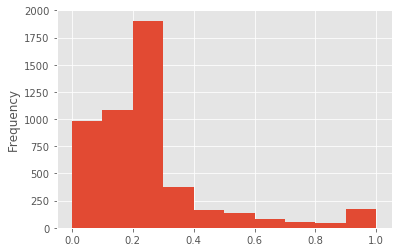

In [68]:
matches['win_contribution'].plot(kind = 'hist')

In [70]:
matches[matches['match_id'] == '3140008780']

,Unnamed: 0,account_id,assists,attack_type_x,camps_stacked,cluster,creeps_stacked,deaths,denies,dire,duration,first_blood_time,gold_per_min,gold_spent,hero_damage,hero_healing,hero_id,kills,last_hits,leagueid,leaguename,level,localized_name_x,match_id,player_slot,primary_attr_x,radiant,start_time,stuns,t_experience_cnt_10,t_experience_cnt_12,t_experience_cnt_15,t_experience_cnt_20,t_experience_cnt_25,t_experience_cnt_3,t_experience_cnt_30,t_experience_cnt_5,t_experience_cnt_8,t_gold_cnt_10,t_gold_cnt_12,t_gold_cnt_15,t_gold_cnt_20,t_gold_cnt_25,t_gold_cnt_3,t_gold_cnt_30,t_gold_cnt_5,t_gold_cnt_8,t_lasthits_cnt_10,t_lasthits_cnt_12,t_lasthits_cnt_15,t_lasthits_cnt_20,t_lasthits_cnt_25,t_lasthits_cnt_3,t_lasthits_cnt_30,t_lasthits_cnt_5,t_lasthits_cnt_8,team_id,tower_damage,win,xp_per_min,id_x,datetime,t_item_aether_lens,t_item_arcane_boots,t_item_black_king_bar,t_item_blade_mail,t_item_blink,t_item_boots,t_item_bottle,t_item_desolator,t_item_echo_sabre,t_item_force_staff,t_item_hand_of_midas,t_item_hurricane_pike,t_item_invis_sword,...,localized_name_x_Oracle,localized_name_x_Outworld Devourer,localized_name_x_Phantom Assassin,localized_name_x_Phantom Lancer,localized_name_x_Phoenix,localized_name_x_Puck,localized_name_x_Pudge,localized_name_x_Pugna,localized_name_x_Queen of Pain,localized_name_x_Razor,localized_name_x_Riki,localized_name_x_Rubick,localized_name_x_Sand King,localized_name_x_Shadow Demon,localized_name_x_Shadow Fiend,localized_name_x_Shadow Shaman,localized_name_x_Silencer,localized_name_x_Skywrath Mage,localized_name_x_Slardar,localized_name_x_Slark,localized_name_x_Sniper,localized_name_x_Spectre,localized_name_x_Spirit Breaker,localized_name_x_Storm Spirit,localized_name_x_Sven,localized_name_x_Templar Assassin,localized_name_x_Terrorblade,localized_name_x_Tidehunter,localized_name_x_Timbersaw,localized_name_x_Tinker,localized_name_x_Tiny,localized_name_x_Treant Protector,localized_name_x_Troll Warlord,localized_name_x_Tusk,localized_name_x_Underlord,localized_name_x_Undying,localized_name_x_Ursa,localized_name_x_Vengeful Spirit,localized_name_x_Venomancer,localized_name_x_Viper,localized_name_x_Visage,localized_name_x_Warlock,localized_name_x_Weaver,localized_name_x_Windranger,localized_name_x_Winter Wyvern,localized_name_x_Witch Doctor,localized_name_x_Wraith King,localized_name_x_Zeus,primary_attr_x_agi,primary_attr_x_int,primary_attr_x_str,radiant_False,radiant_True,Carry_0,Carry_1,Disabler_0,Disabler_1,Durable_0,Durable_1,Escape_0,Escape_1,Initiator_0,Initiator_1,Jungler_0,Jungler_1,Nuker_0,Nuker_1,Pusher_0,Pusher_1,Support_0,Support_1,prediction,win_prob,cumulative_prob,win_contribution
30,6,115102590,10,Ranged,0.0,131,0.0,0,3,False,1944,125,289,7450,3501,9160,50,4,41,5157,Kiev Major,14,Dazzle,3140008780,1,int,True,1493150971,0.0000,1219.0,1842.0,2347.0,3472.0,4754.0,213.0,6808.0,412.0,1027.0,1564.0,2273.0,3148.0,4749.0,6123.0,281.0,7472.0,463.0,1176.0,9.0,9.0,15.0,23.0,32.0,1.0,39.0,1.0,6.0,2108395,29,True,290,3140008780_115102590,25.04.2017 23:09:31,1362.222222,683.805318,1483.887015,1213.621212,1114.601311,299.0,226.193299,1170.883817,1121.701149,1371.479315,958.093989,1358.657277,1237.78209,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,True,0.937671,4.635119,0.202297
31,605,184950344,1,Ranged,0.0,131,0.0,1,14,False,1944,125,723,22830,24183,0,76,12,275,5157,Kiev Major,22,Outworld Devourer,3140008780,0,int,True,1493150971,90.0378,3407.0,4901.0,6139.0,8471.0,12263.0,607.0,17070.0,1597.0,2494.0,2800.0,4265.0,6074.0,9055.0,13078.0,560.0,18540.0,1244.0,2080.0,45.0,69.0,92.0,122.0,169.0,7.0,244.0,20.0,33.0,2108395,4422,True,633,3140008780_184950344,25.04.2017 23:09:31,1362.222222,683.805318,1483.887015,1213.621212,1323.000000,220.0,153.000000,1170.883817,1121.701149,1172.000000,645.000000,1220.000000,1237.78209,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [71]:
matches['match_id'].unique().shape

(562L,)

In [72]:
matches.groupby(['match_id'])['match_id'].size().describe()

count    562.000000
mean       8.866548
std        1.353013
min        3.000000
25%        8.000000
50%        9.000000
75%       10.000000
max       10.000000
dtype: float64

# Сделать разбиение по ролям!!! просто X_train_norm[player_id in ...]